In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [64]:
df = pd.read_csv("sleep_3000.csv")
label = df["Sleep Disorder"]
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None")
df = df.drop("Person ID",axis = 1)
df.replace('_RARE_', np.nan, inplace=True)
df.head()

Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0    Male   39      Lawyer             5.9                 8   
1  Female   39  Accountant             6.0                 6   
2  Female   35    Engineer             5.9                 7   
3  Female   48    Engineer             6.0                 8   
4    Male   28      Doctor             7.7                 5   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       60             7       Normal         130/85   
1                       60             4   Overweight         115/75   
2                       80             8       Normal         120/80   
3                       30             8       Normal         125/80   
4                       90             6       Normal            NaN   

   Heart Rate  Daily Steps Sleep Disorder  
0          68         8000           None  
1          78         7000           None  
2          65         8000           None  
3          65         7000           None  
4          70         8000           None

# **Exploratory Data Analysis**

<Figure size 640x480 with 0 Axes>

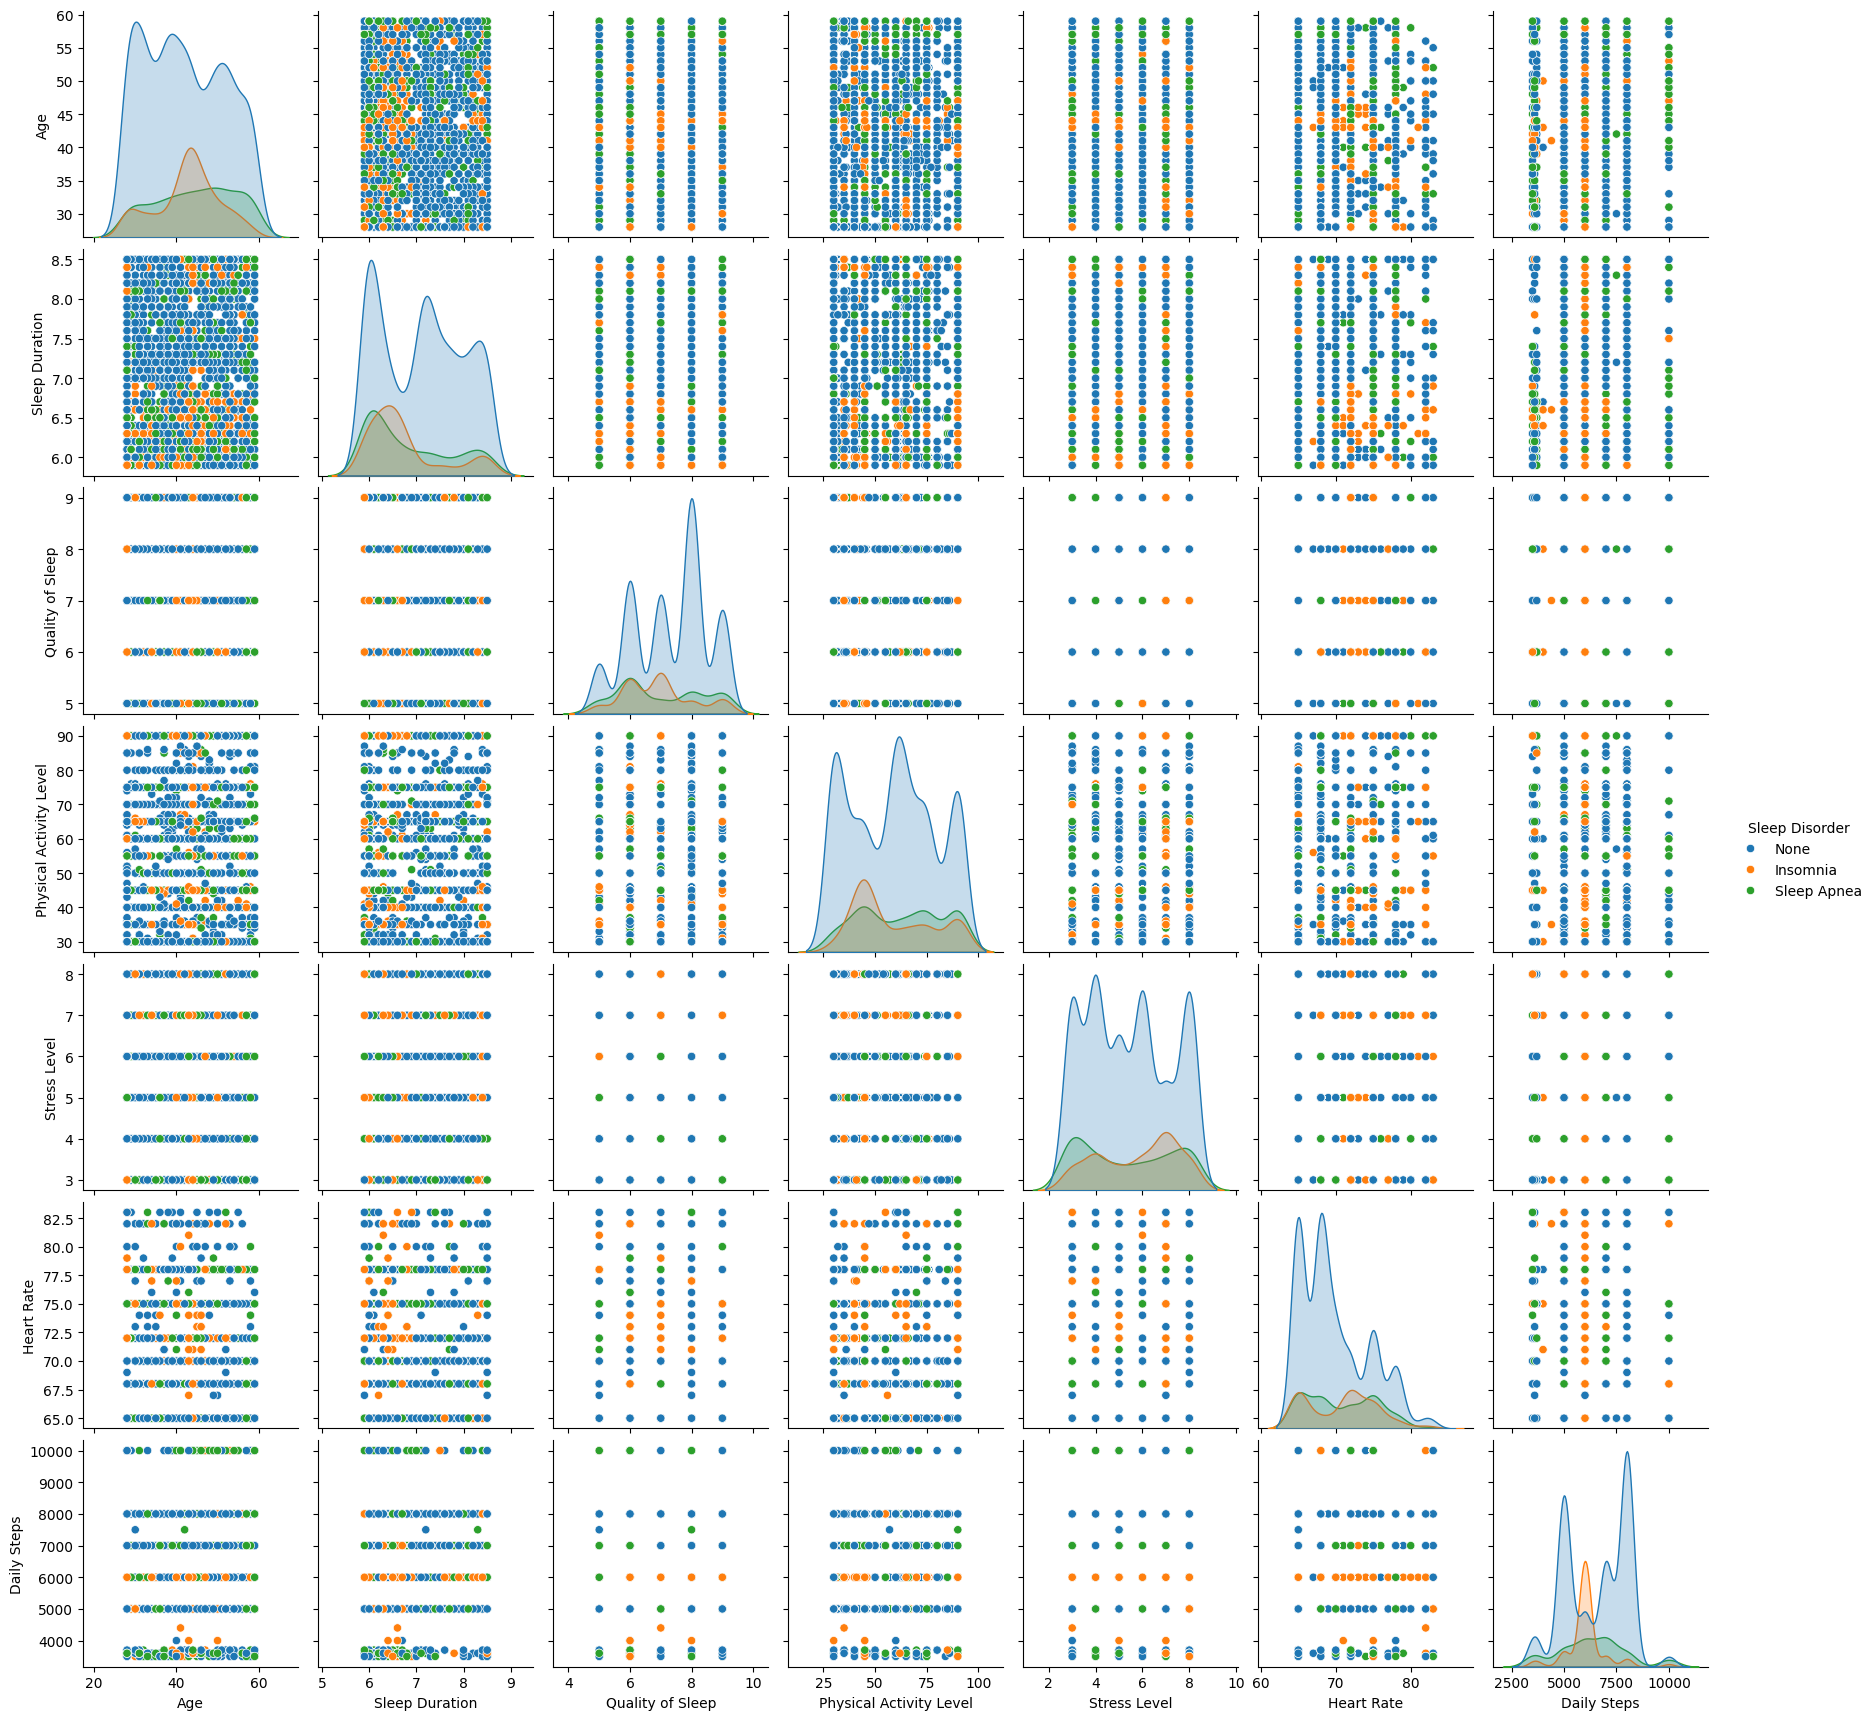

In [65]:
plt.figure()
sns.pairplot(df,hue="Sleep Disorder")
plt.show()

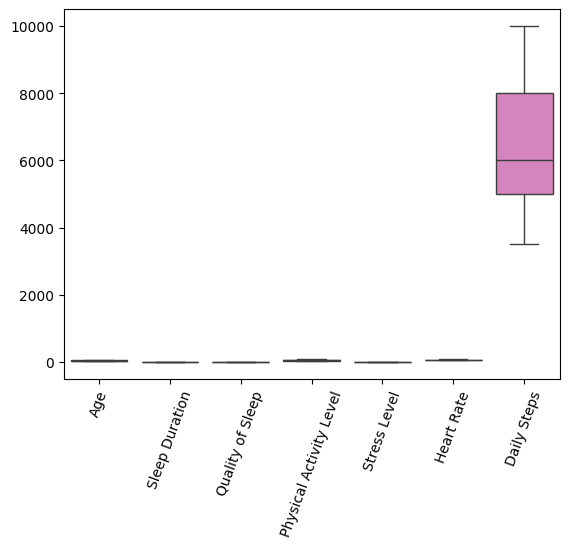

In [66]:
plt.figure()
sns.boxplot(df)
plt.xticks(rotation=70)
plt.show()

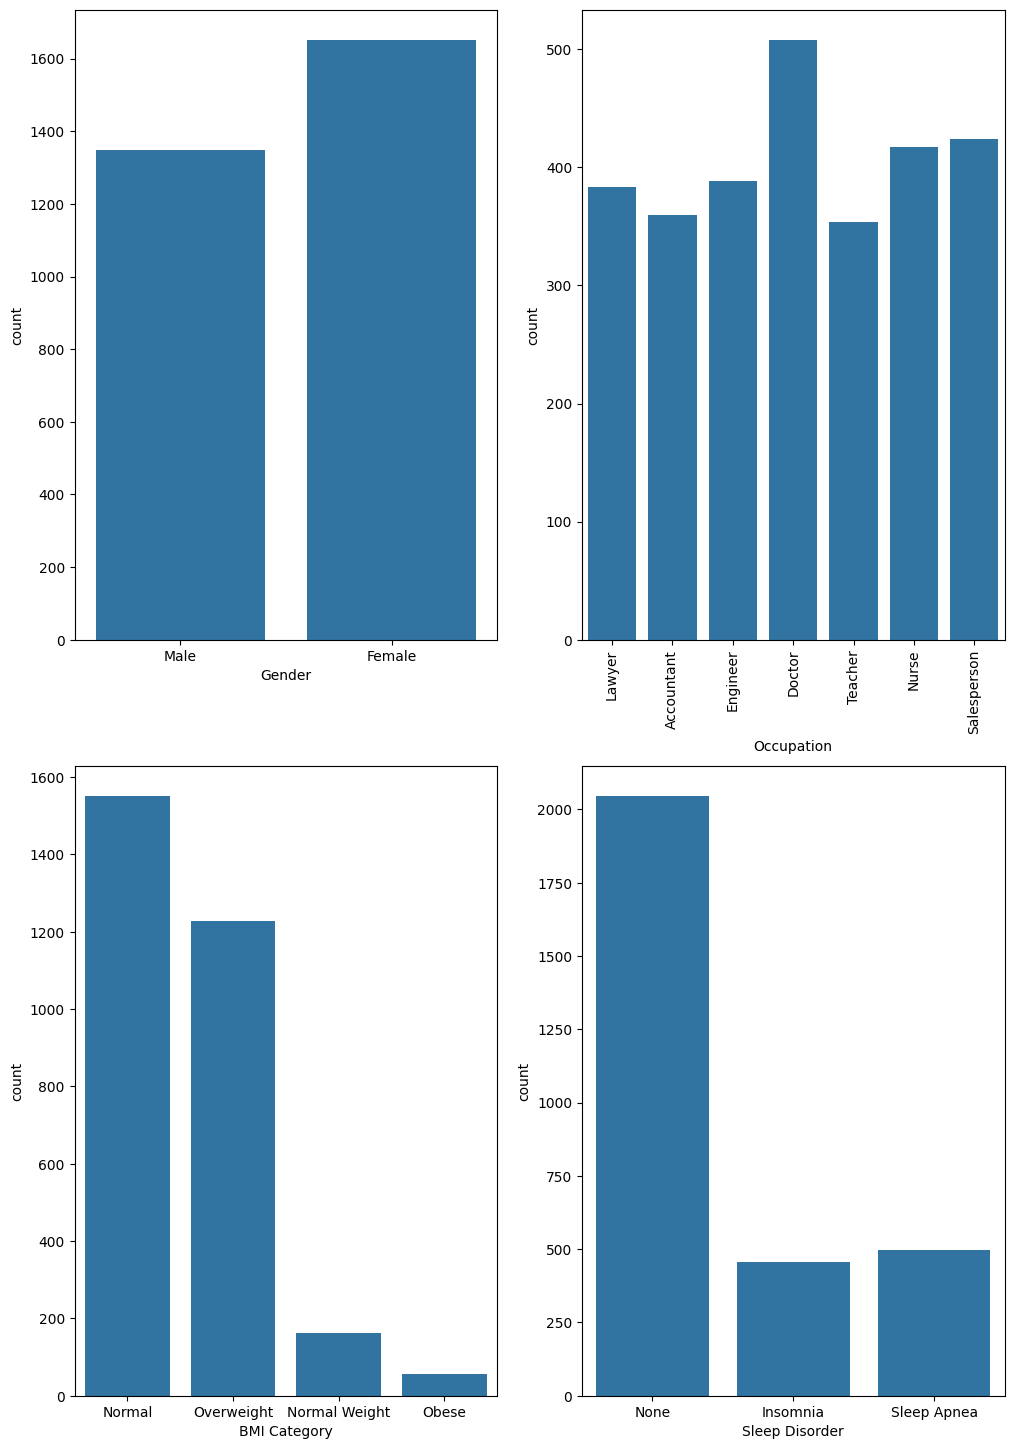

In [67]:
plt.figure(figsize=(12,18))
plt.subplot(2,2,1)
sns.countplot(df,x='Gender')

plt.subplot(2,2,2)
sns.countplot(df,x='Occupation')
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
sns.countplot(df,x='BMI Category')

plt.subplot(2,2,4)
sns.countplot(df,x='Sleep Disorder')

plt.show()

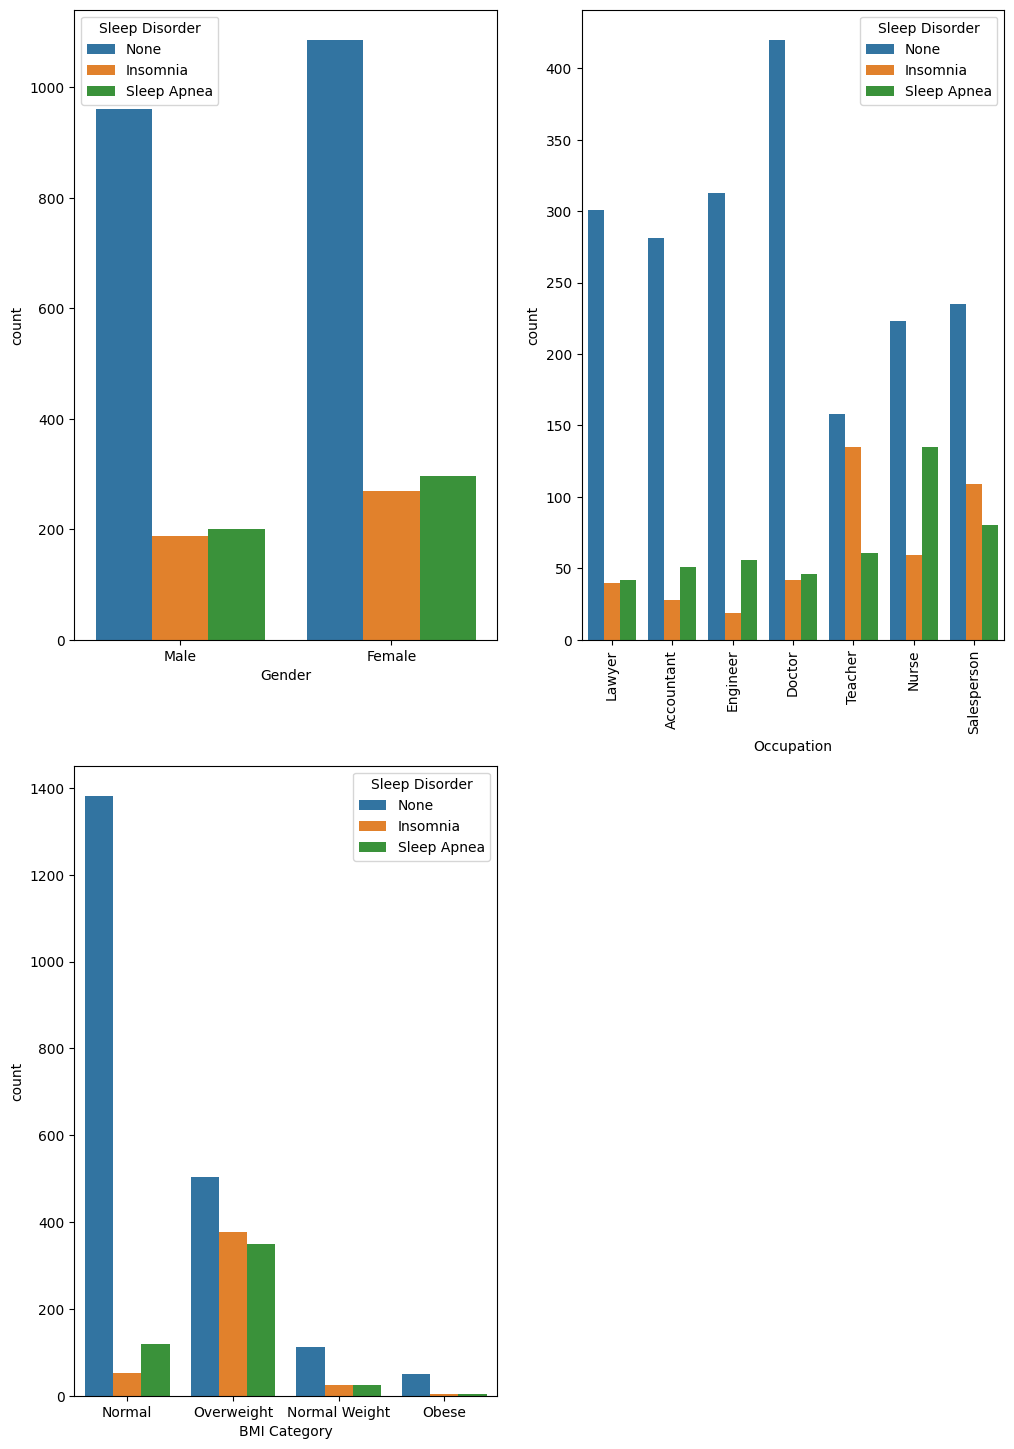

In [68]:
plt.figure(figsize=(12,18))
plt.subplot(2,2,1)
sns.countplot(df,x='Gender',hue='Sleep Disorder')

plt.subplot(2,2,2)
sns.countplot(df,x='Occupation',hue='Sleep Disorder')
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
sns.countplot(df,x='BMI Category',hue='Sleep Disorder')

plt.show()

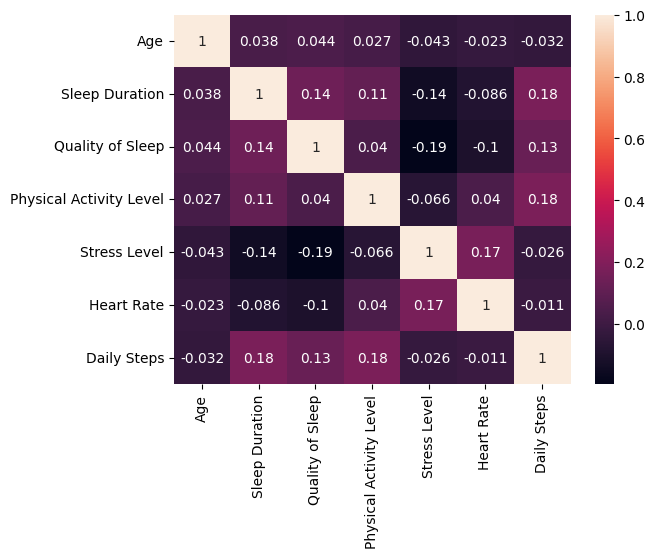

In [69]:
plt.figure()
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True);
plt.show()

In [70]:
!pip install ydata-profiling
import ydata_profiling
report = df.profile_report(title="Sleep Data Analysis")
report.to_notebook_iframe()


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Data Preprocessing**

In [71]:
print(df.isna().sum())



Gender                       0
Age                          0
Occupation                 166
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure             218
Heart Rate                   0
Daily Steps                  0
Sleep Disorder               0
dtype: int64


In [72]:
df[['Systolic','Diastolic']] = df['Blood Pressure'].str.split('/',expand=True).apply(pd.to_numeric, errors='coerce')
df = pd.get_dummies(df,columns=["Occupation"],prefix="Occupation")
df.drop('Blood Pressure',axis=1,inplace=True)
df.head()

Gender  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0    Male   39             5.9                 8                       60   
1  Female   39             6.0                 6                       60   
2  Female   35             5.9                 7                       80   
3  Female   48             6.0                 8                       30   
4    Male   28             7.7                 5                       90   

   Stress Level BMI Category  Heart Rate  Daily Steps Sleep Disorder  \
0             7       Normal          68         8000           None   
1             4   Overweight          78         7000           None   
2             8       Normal          65         8000           None   
3             8       Normal          65         7000           None   
4             6       Normal          70         8000           None   

   Systolic  Diastolic  Occupation_Accountant  Occupation_Doctor  \
0     130.0       85.0                  False              False   
1     115.0       75.0                   True              False   
2     120.0       80.0                  False              False   
3     125.0       80.0                  False              False   
4       NaN        NaN                  False               True   

   Occupation_Engineer  Occupation_Lawyer  Occupation_Nurse  \
0                False               True             False   
1                False              False             False   
2                 True              False             False   
3                 True              False             False   
4                False              False             False   

   Occupation_Salesperson  Occupation_Teacher  
0                   False               False  
1                   False               False  
2                   False               False  
3                   False               False  
4                   False               False

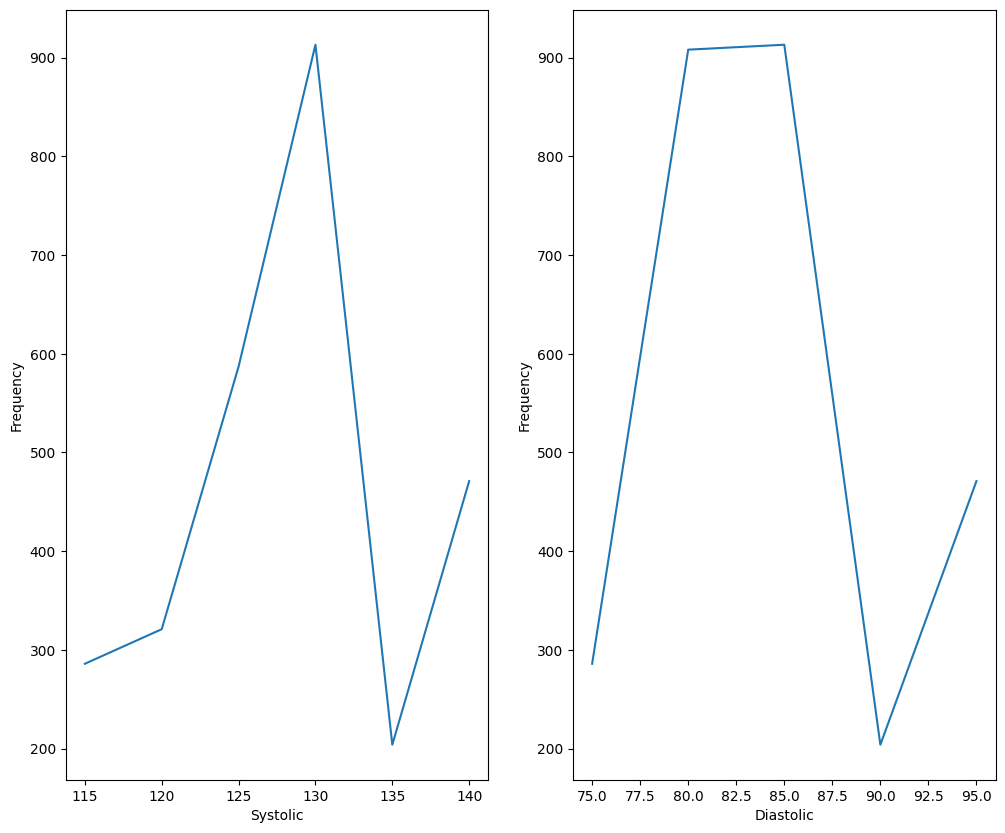

In [73]:
high_count = df['Systolic'].value_counts()
low_count = df['Diastolic'].value_counts()

high_count.sort_index(inplace = True)
low_count.sort_index(inplace = True)

plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)
plt.plot(high_count.index,high_count.values)
plt.xlabel('Systolic')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.plot(low_count.index,low_count.values)
plt.xlabel('Diastolic')
plt.ylabel('Frequency')

plt.show()

In [74]:
df['Systolic'].fillna(df['Systolic'].mean(), inplace=True)
df['Diastolic'].fillna(df['Diastolic'].median(), inplace=True)

/var/folders/th/gcymwv6n1qq298rgjfmpfj380000gn/T/ipykernel_72878/2773316590.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Systolic'].fillna(df['Systolic'].mean(), inplace=True)
/var/folders/th/gcymwv6n1qq298rgjfmpfj380000gn/T/ipykernel_72878/2773316590.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [75]:
print(df.isna().sum())

Gender                     0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic                   0
Diastolic                  0
Occupation_Accountant      0
Occupation_Doctor          0
Occupation_Engineer        0
Occupation_Lawyer          0
Occupation_Nurse           0
Occupation_Salesperson     0
Occupation_Teacher         0
dtype: int64


In [76]:
df.duplicated().sum()

0

In [77]:
df.describe()

Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  3000.000000     3000.000000       3000.000000              3000.000000   
mean     42.526000        7.017333          7.197000                59.496333   
std       9.397984        0.873552          1.232084                20.216401   
min      28.000000        5.900000          5.000000                30.000000   
25%      34.000000        6.200000          6.000000                45.000000   
50%      43.000000        7.000000          7.000000                60.000000   
75%      50.000000        7.800000          8.000000                75.000000   
max      59.000000        8.500000          9.000000                90.000000   

       Stress Level   Heart Rate   Daily Steps     Systolic    Diastolic  
count   3000.000000  3000.000000   3000.000000  3000.000000  3000.000000  
mean       5.440667    70.093667   6447.466667   128.308771    84.443333  
std        1.777507     4.554610   1457.136918     7.197675     5.848207  
min        3.000000    65.000000   3500.000000   115.000000    75.000000  
25%        4.000000    65.000000   5000.000000   125.000000    80.000000  
50%        5.000000    68.000000   6000.000000   130.000000    85.000000  
75%        7.000000    75.000000   8000.000000   130.000000    85.000000  
max        8.000000    83.000000  10000.000000   140.000000    95.000000

In [78]:
from sklearn.preprocessing import StandardScaler
numerical_features = ["Age","Sleep Duration","Quality of Sleep","Physical Activity Level","Stress Level","Heart Rate","Daily Steps","Diastolic","Systolic"]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.describe()

Age  Sleep Duration  Quality of Sleep  \
count  3.000000e+03    3.000000e+03      3.000000e+03   
mean  -3.659295e-16    1.515825e-16     -5.447494e-17   
std    1.000167e+00    1.000167e+00      1.000167e+00   
min   -1.545908e+00   -1.279282e+00     -1.783455e+00   
25%   -9.073671e-01   -9.357991e-01     -9.716868e-01   
50%    5.044476e-02   -1.984566e-02     -1.599184e-01   
75%    7.954095e-01    8.961078e-01      6.518501e-01   
max    1.753221e+00    1.697567e+00      1.463619e+00   

       Physical Activity Level  Stress Level    Heart Rate   Daily Steps  \
count             3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03   
mean              6.276461e-17 -2.155313e-16  5.925630e-16  2.865856e-16   
std               1.000167e+00  1.000167e+00  1.000167e+00  1.000167e+00   
min              -1.459273e+00 -1.373313e+00 -1.118540e+00 -2.023117e+00   
25%              -7.171776e-01 -8.106334e-01 -1.118540e+00 -9.935291e-01   
50%               2.491792e-02 -2.479540e-01 -4.597574e-01 -3.071374e-01   
75%               7.670134e-01  8.774046e-01  1.077403e+00  1.065646e+00   
max               1.509109e+00  1.440084e+00  2.834158e+00  2.438429e+00   

           Systolic     Diastolic  
count  3.000000e+03  3.000000e+03  
mean  -3.276786e-15  9.284425e-16  
std    1.000167e+00  1.000167e+00  
min   -1.849346e+00 -1.615009e+00  
25%   -4.597766e-01 -7.599037e-01  
50%    2.350080e-01  9.520174e-02  
75%    2.350080e-01  9.520174e-02  
max    1.624577e+00  1.805413e+00

In [100]:
import pickle

with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

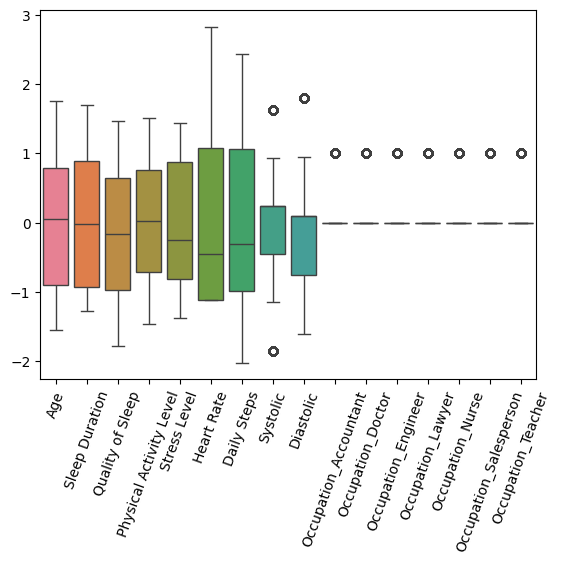

In [79]:
plt.figure()
sns.boxplot(df)
plt.xticks(rotation=70)
plt.show()

In [80]:
categorical_columns = ["Gender","BMI Category"]
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)



{'Female': 0, 'Male': 1}
{'Normal': 0, 'Normal Weight': 1, 'Obese': 2, 'Overweight': 3}


In [81]:
# from sklearn.decomposition import PCA
# X = df.drop('Sleep Disorder', axis=1)
# y = df["Sleep Disorder"]
# pca = PCA(n_components=2)
# X_transformed = pca.fit_transform(X)
# y = le.fit_transform(y)

# plt.figure()
# plt.scatter(X_transformed[:,0],X_transformed[:,1],c=y,cmap="plasma")
# plt.xlabel("Dimension 1")
# plt.ylabel("Dimension 2")
# plt.show()

# **Model Training**

In [82]:
from imblearn.over_sampling import SMOTE  # Class imabalance handling
# label=label.tolist()
y = df["Sleep Disorder"]
X = df.drop("Sleep Disorder",axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.80)
counter_before = Counter(y_train)
print("Before oversampling : ",counter_before)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)
counter_after = Counter(y_train)
print("After oversampling : ",counter_after)

Before oversampling :  Counter({'None': 1630, 'Sleep Apnea': 404, 'Insomnia': 366})
After oversampling :  Counter({'None': 1630, 'Sleep Apnea': 1630, 'Insomnia': 1630})


In [101]:
X.head

<bound method NDFrame.head of       Gender       Age  Sleep Duration  Quality of Sleep  \
0          1 -0.375249       -1.279282          0.651850   
1          0 -0.375249       -1.164787         -0.971687   
2          0 -0.800944       -1.279282         -0.159918   
3          0  0.582562       -1.164787          0.651850   
4          1 -1.545908        0.781614         -1.783455   
...      ...       ...             ...               ...   
2995       0  1.221104       -0.935799         -0.971687   
2996       1  0.476139       -0.134340          1.463619   
2997       0  0.476139        0.209143         -0.159918   
2998       0  1.221104       -0.477822         -0.971687   
2999       0 -0.694520        0.781614         -0.159918   

      Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                    0.024918      0.877405             0   -0.459757   
1                    0.024918     -0.810633             3    1.736186   
2                    1.014379 

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)
y_prob_gnb = gnb.predict_proba(X_test)

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

auc_roc_gnb = roc_auc_score(y_test, y_prob_gnb, multi_class='ovr')

cv_scores = cross_val_score(gnb, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()

print(f"Naive Bayes Accuracy: {accuracy_gnb:.4f}")
print(f"Naive Bayes AUC-ROC Score: {auc_roc_gnb:.4f}")
print(f"5-Fold Cross-Validation Accuracy of Naive Bayes: {mean_cv_accuracy:.4f}")

Naive Bayes Accuracy: 0.6683
Naive Bayes AUC-ROC Score: 0.7769
5-Fold Cross-Validation Accuracy of Naive Bayes: 0.6575


In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier(random_state=42)

dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
y_prob_dtc = dtc.predict_proba(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
auc_roc_dtc = roc_auc_score(y_test, y_prob_dtc, multi_class='ovr')

cv_scores = cross_val_score(dtc, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()

print(f"Decision Tree Accuracy: {accuracy_dtc:.4f}")
print(f"Decision Tree AUC-ROC Score: {auc_roc_dtc:.4f}")
print(
    f"5-Fold Cross-Validation Accuracy of Decision Tree: {mean_cv_accuracy:.4f}")

Decision Tree Accuracy: 0.6267
Decision Tree AUC-ROC Score: 0.6314
5-Fold Cross-Validation Accuracy of Decision Tree: 0.7947


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
auc_roc_rfc = roc_auc_score(y_test, y_prob_rfc, multi_class='ovr')

cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()

print(f"Random Forest Accuracy: {accuracy_rfc:.4f}")
print(f"Random Forest AUC-ROC Score: {auc_roc_rfc:.4f}")
print(f"5-Fold Cross-Validation Accuracy of Random Forest: {mean_cv_accuracy:.4f}")

Random Forest Accuracy: 0.7317
Random Forest AUC-ROC Score: 0.7955
5-Fold Cross-Validation Accuracy of Random Forest: 0.8892


In [86]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

perceptron.fit(X_train, y_train)

y_pred_perceptron = perceptron.predict(X_test)

accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)


cv_scores = cross_val_score(perceptron, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()

print(f"Perceptron Accuracy: {accuracy_perceptron:.4f}")
print(f"5-Fold Cross-Validation Accuracy of Perceptron: {mean_cv_accuracy:.4f}")

Perceptron Accuracy: 0.5567
5-Fold Cross-Validation Accuracy of Perceptron: 0.5804


In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)


accuracy = accuracy_score(y_test, y_pred)
auc_roc_knn = roc_auc_score(y_test, y_prob_knn, multi_class='ovr')
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()
print(f"Knn AUC-ROC Score: {auc_roc_knn:.4f}")
print(f"5-Fold Cross-Validation Accuracy of Knn: {mean_cv_accuracy:.4f}")
print(f'Knn Accuracy:{accuracy :.4f}')

Knn AUC-ROC Score: 0.7381
5-Fold Cross-Validation Accuracy of Knn: 0.8720
Knn Accuracy:0.6283


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc_roc_lr = roc_auc_score(y_test, y_prob_lr, multi_class='ovr')
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()
print(f"Logistic Regression AUC-ROC Score: {auc_roc_lr:.4f}")
print(f'Logistic RegressionAccuracy: {accuracy :.4f}')
print(
    f"5-Fold Cross-Validation Accuracy of Logistic Regression: {mean_cv_accuracy:.4f}")

Logistic Regression AUC-ROC Score: 0.7741
Logistic RegressionAccuracy: 0.6800
5-Fold Cross-Validation Accuracy of Logistic Regression: 0.6703


In [89]:
from sklearn.ensemble import VotingClassifier

clf1 = GaussianNB()
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)
clf4 = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
clf5 = LogisticRegression()
clf6 = KNeighborsClassifier(n_neighbors=3)
ensemble = VotingClassifier(
    estimators=[('gnb', clf1), ('dtc', clf2), ('rfc', clf3), ('per', clf4),('log_reg',clf5),('knn',clf6)],
    voting='hard'
)


ensemble.fit(X_train, y_train)

y_pred_ensemble = ensemble.predict(X_test)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

cv_scores = cross_val_score(ensemble, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()


print(f'Ensemble Model Accuracy: {accuracy_ensemble :.4f}')
print(f"5-Fold Cross-Validation Accuracy of Ensemble Model: {mean_cv_accuracy:.4f}")

Ensemble Model Accuracy: 0.6917
5-Fold Cross-Validation Accuracy of Ensemble Model: 0.8186


In [90]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
# param_grid={
#     'n_estimators': [300],
#     'max_depth': [None],
#     'min_samples_split': [5],
#     'min_samples_leaf': [2],
# }

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)


best_rfc = grid_search.best_estimator_
best_rfc.fit(X_train, y_train)


y_pred_best_rfc = best_rfc.predict(X_test)
y_prob_best_rfc = best_rfc.predict_proba(X_test)

auc_roc_best_rfc = roc_auc_score(y_test, y_prob_best_rfc, multi_class='ovr')
accuracy_best_rfc = accuracy_score(y_test, y_pred_best_rfc)
cv_scores = cross_val_score(best_rfc, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()

print(f"Optimized Random Forest AUC-ROC Score: {auc_roc_best_rfc:.4f}")
print(f"Optimized Random Forest Accuracy: {accuracy_best_rfc:.4f}")
print(
    f"5-Fold Cross-Validation Accuracy of Optimized Random Forest: {mean_cv_accuracy:.4f}")
# print(classification_report(y_test, y_pred_best_rfc, target_names=le.classes_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Optimized Random Forest AUC-ROC Score: 0.8012
Optimized Random Forest Accuracy: 0.7333
5-Fold Cross-Validation Accuracy of Optimized Random Forest: 0.8947


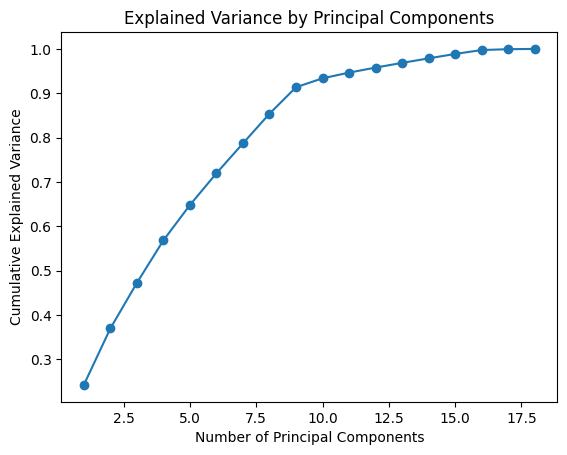

In [91]:
from sklearn.decomposition import PCA
X = df.drop('Sleep Disorder', axis=1)
y = df["Sleep Disorder"]
pca = PCA()
X_transformed = pca.fit_transform(X)
y = le.fit_transform(y)

plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.show()

In [92]:
y = df["Sleep Disorder"]
X = df.drop("Sleep Disorder",axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.80)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)

pca_optimal = PCA(n_components=0.95)
X_pca_optimal = pca_optimal.fit_transform(X_train)
X_test_pca_optimal = pca_optimal.fit_transform(X_test)

In [93]:
from sklearn.svm import SVC
param_grid = {'C': [0.1,0.5,1,5,10,100],  
              'gamma': [1,0.1,0.5,0.01], 
              'kernel': ['rbf','linear','polynomial']}  

grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(X_pca_optimal, y_train)

print("Best parameters found:", grid_search.best_params_)


best_rfc = grid_search.best_estimator_
best_rfc.fit(X_pca_optimal, y_train)


y_pred_best_rfc = best_rfc.predict(X_test_pca_optimal)
# y_prob_best_rfc = best_rfc.predict_proba(X_test_pca_optimal)

# auc_roc_best_rfc = roc_auc_score(y_test, y_prob_best_rfc, multi_class='ovr')
accuracy_best_rfc = accuracy_score(y_test, y_pred_best_rfc)
cv_scores = cross_val_score(best_rfc, X_pca_optimal, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()

# print(f"Optimized Random Forest AUC-ROC Score: {auc_roc_best_rfc:.4f}")
print(f"Optimized SVM Accuracy: {accuracy_best_rfc:.4f}")
print(
    f"5-Fold Cross-Validation Accuracy of Optimized Random Forest: {mean_cv_accuracy:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraint

Best parameters found: {'C': 5, 'gamma': 1, 'kernel': 'rbf'}
Optimized SVM Accuracy: 0.6950
5-Fold Cross-Validation Accuracy of Optimized Random Forest: 0.9479


In [102]:
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)


best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)


y_pred = best_svm.predict(X_test)
# y_prob_best_rfc = best_rfc.predict_proba(X_test_pca_optimal)

# auc_roc_best_rfc = roc_auc_score(y_test, y_prob_best_rfc, multi_class='ovr')
accuracy_best_rfc = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(best_svm, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()

# print(f"Optimized Random Forest AUC-ROC Score: {auc_roc_best_rfc:.4f}")
print(f"Optimized SVM Accuracy: {accuracy_best_rfc:.4f}")
print(
    f"5-Fold Cross-Validation Accuracy of Optimized Random Forest: {mean_cv_accuracy:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraint

Best parameters found: {'C': 5, 'gamma': 0.5, 'kernel': 'rbf'}
Optimized SVM Accuracy: 0.7083
5-Fold Cross-Validation Accuracy of Optimized Random Forest: 0.9468


In [104]:
print(X_test)
print(y_pred)

      Gender       Age  Sleep Duration  Quality of Sleep  \
1801       0 -0.375249        1.697567         -0.971687   
1190       1 -0.268826       -0.821305         -0.971687   
1817       0  0.476139        1.354084         -0.971687   
251        1 -0.588096       -1.279282          1.463619   
2505       0  1.008257       -0.363328          0.651850   
...      ...       ...             ...               ...   
104        1  1.540374        1.468579          0.651850   
2087       0 -0.694520        0.552625         -0.971687   
599        1 -0.588096        0.323637          0.651850   
1756       1 -0.588096       -1.164787          0.651850   
1323       0  0.156868        0.667119         -0.159918   

      Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
1801                 0.767013      0.314725             3   -1.118540   
1190                 0.024918     -0.247954             3    1.077403   
1817                 1.509109      0.314725             1   

In [95]:
import pickle

with open('SVM_Optimised_model.pkl','wb') as f:
    pickle.dump(best_svm,f)

# load
with open('SVM_Optimised_model.pkl', 'rb') as f:
    best_svm = pickle.load(f)

In [96]:
import pickle

with open('Random_Forest_Optimised_model.pkl','wb') as f:
    pickle.dump(best_rfc,f)

# load
with open('Random_Forest_Optimised_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [97]:
import os
import requests
from flask import Flask, request

In [98]:
# app = Flask(__name__)

# @app.route('/api/input', methods=['GET'])
# def GetPrediction():
#   input = request.args['query']
#   d={}
#   d["output"]=str(input)
#   print(input)
#   return d


# app.run(debug=False,host="0.0.0.0",port=4444)
# input_data = [
#     0,                           # Gender
#     -0.37524940647582056,        # Age
#     1.697566990208276,           # Sleep Duration
#     -0.971686834747765,          # Quality of Sleep
#     0.7670134220942246,          # Physical Activity Level
#     0.3147253076298664,          # Stress Level
#     3,                           # BMI Category
#     -1.1185404504731764,         # Heart Rate
#     -0.30713741277226986,        # Daily Steps
#     -0.45977656779801523,        # Systolic
#     -0.7599037156231677,         # Diastolic
#     0,                           # Occupation_Accountant
#     1,                           # Occupation_Doctor
#     0,                           # Occupation_Engineer
#     0,                           # Occupation_Lawyer
#     0,                           # Occupation_Nurse
#     0,                           # Occupation_Salesperson
#     0                            # Occupation_Teacher
# ]

input_data = [
    1,                       # Gender
    -0.268826,               # Age
    -0.821305,               # Sleep Duration
    -0.971687,               # Quality of Sleep
    0.024918,                # Physical Activity Level
    -0.247954,               # Stress Level
    3,                       # BMI Category
    1.077403,                # Heart Rate
    -0.307137,               # Daily Steps
    -0.459777,               # Systolic
    -0.759904,               # Diastolic
    0,                       # Occupation_Accountant
    0,                       # Occupation_Doctor
    0,                       # Occupation_Engineer
    0,                       # Occupation_Lawyer
    0,                       # Occupation_Nurse
    1,                       # Occupation_Salesperson
    0                        # Occupation_Teacher
]

# Convert to a 2D array (1 sample, n features)
input_data = np.array([input_data])
rfc.predict(input_data)

/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Insomnia'], dtype=object)

In [99]:
X_test.iloc[1]

Gender                            1
Age                       -0.268826
Sleep Duration            -0.821305
Quality of Sleep          -0.971687
Physical Activity Level    0.024918
Stress Level              -0.247954
BMI Category                      3
Heart Rate                 1.077403
Daily Steps               -0.307137
Systolic                  -0.459777
Diastolic                 -0.759904
Occupation_Accountant         False
Occupation_Doctor             False
Occupation_Engineer           False
Occupation_Lawyer             False
Occupation_Nurse              False
Occupation_Salesperson         True
Occupation_Teacher            False
Name: 1190, dtype: object